## k-Anonymity Library Demo with k=3

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kAnonymityLib as daio_dpt
import pandas as pd
dai_anonymization = daio_dpt.kAnonymity()
print(dai_anonymization)

k-Anonymity Class Library with k=3


In [3]:
names = ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']
dai_anonymization.set_headers(names)

In [4]:
dai_anonymization.read_datafile("adult-all.txt")

In [5]:
df = dai_anonymization.dataframe

In [6]:
age_range = lambda age: ("<= 20" if age <= 20 
    else ("21 - 30" if age <= 30 
    else ("31 - 40" if age <= 40 
    else ("41 - 50" if age <= 50 
    else ("51 - 60" if age <= 60 
    else ("61 - 70" if age <= 70 else "> 70"))))))

In [7]:
df["age"] = df.apply(lambda x: age_range(x.age), axis=1)

In [8]:
categorical = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income',
 'age']

In [9]:
feature_columns = ['race', 'sex', 'age']

In [10]:
dai_anonymization.set_categorial(categorical)

In [11]:
dai_anonymization.set_feature_columns(feature_columns)

In [12]:
dai_anonymization.set_sensitive_column("income")

In [13]:
dd = pd.Series({c: df[c].unique() for c in df})
print(dd)

age               ['31 - 40', '41 - 50', '51 - 60', '21 - 30', '...
workclass         [' State-gov', ' Self-emp-not-inc', ' Private'...
fnlwgt            [77516, 83311, 215646, 234721, 338409, 284582,...
education         [' Bachelors', ' HS-grad', ' 11th', ' Masters'...
education-num     [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...
marital-status    [' Never-married', ' Married-civ-spouse', ' Di...
occupation        [' Adm-clerical', ' Exec-managerial', ' Handle...
relationship      [' Not-in-family', ' Husband', ' Wife', ' Own-...
race              [' White', ' Black', ' Asian-Pac-Islander', ' ...
sex               [' Male', ' Female']
Categories (2, object): [...
capital-gain      [2174, 0, 14084, 5178, 5013, 2407, 14344, 1502...
capital-loss      [0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, ...
hours-per-week    [40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 4...
native-country    [' United-States', ' Cuba', ' Jamaica', ' Indi...
income            [' <=50k', ' >50k']
Categories

In [14]:
dai_anonymization.partition_dataset()
print( len(dai_anonymization.finished_partitions) )

67


In [15]:
dai_anonymization.build_anonymized_dataset()

In [16]:
df1 = dai_anonymization.result_df

In [17]:
df1.to_csv("result.csv")

total records = 48780
population size = 48842
age
21 - 30    12170
31 - 40    12838
41 - 50    10363
51 - 60     6201
61 - 70     2726
<= 20       3619
> 70         863
dtype: int64


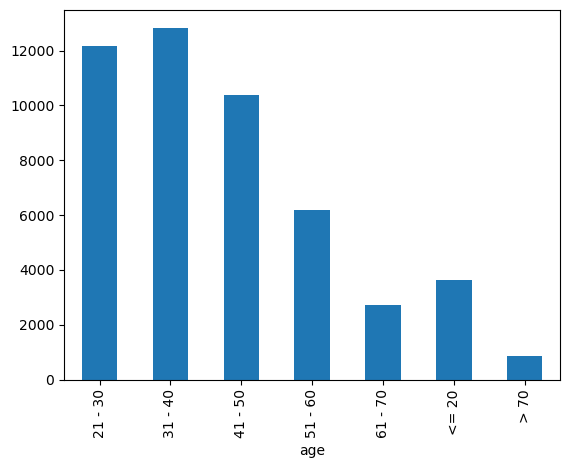

In [18]:
df1.groupby("age").size().plot.bar()
print(f"total records = {df1.age.size}")
print(f"population size = {df.age.size}")
print(df1.groupby("age").size())